Import the relevant extensions required

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import scipy as spy
import statsmodels.api as sm
import seaborn as sns
import dtreeviz
from numpy.linalg import norm
from dtreeviz.trees import *
from sklearn.cluster import KMeans
from sklearn import tree, metrics, model_selection
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, classification_report, roc_auc_score, mean_absolute_error, r2_score
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression

Run the file

In [2]:
data = pd.read_csv('heart.csv')
#https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset/data?select=heart.csv

In [3]:
data.rename(columns ={
    "age" : "Age",
    "sex" : "Sex",
    "cp" : "Chest_Pain",
    "trtbps" : "Resting_Blood_Pressure",
    "chol" : "Cholesterol",
    "fbs" : "Fasting_Blood_Sugar",
    "restecg" : "Resting_ECG",
    "thalachh" : "Max_Heart_Rate",
    "exng" : "Exercise_Angina",
    "oldpeak" : "Old_Peak",
    "slp" : "ST_Slope",
    "caa" : "n_Major_Vessels",
    "thall" : "Thalium",
    "output" : "Status" 
}, inplace = True)

In [4]:
stats_df = data.copy()
stats_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
Sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
Chest_Pain,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
Resting_Blood_Pressure,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
Cholesterol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
Fasting_Blood_Sugar,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
Resting_ECG,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
Max_Heart_Rate,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
Exercise_Angina,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
Old_Peak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [5]:
#Checking for null values
data.isnull().sum()

Age                       0
Sex                       0
Chest_Pain                0
Resting_Blood_Pressure    0
Cholesterol               0
Fasting_Blood_Sugar       0
Resting_ECG               0
Max_Heart_Rate            0
Exercise_Angina           0
Old_Peak                  0
ST_Slope                  0
n_Major_Vessels           0
Thalium                   0
Status                    0
dtype: int64

In [6]:
data['Old_Peak'] = data['Old_Peak'].astype(np.int64)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     303 non-null    int64
 1   Sex                     303 non-null    int64
 2   Chest_Pain              303 non-null    int64
 3   Resting_Blood_Pressure  303 non-null    int64
 4   Cholesterol             303 non-null    int64
 5   Fasting_Blood_Sugar     303 non-null    int64
 6   Resting_ECG             303 non-null    int64
 7   Max_Heart_Rate          303 non-null    int64
 8   Exercise_Angina         303 non-null    int64
 9   Old_Peak                303 non-null    int64
 10  ST_Slope                303 non-null    int64
 11  n_Major_Vessels         303 non-null    int64
 12  Thalium                 303 non-null    int64
 13  Status                  303 non-null    int64
dtypes: int64(14)
memory usage: 33.3 KB


,Age,Sex,Chest_Pain,Resting_Blood_Pressure,Cholesterol,Fasting_Blood_Sugar,Resting_ECG,Max_Heart_Rate,Exercise_Angina,Old_Peak,ST_Slope,n_Major_Vessels,Thalium,Status
0,63,1,3,145,233,1,0,150,0,2,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0,2,0,2,1


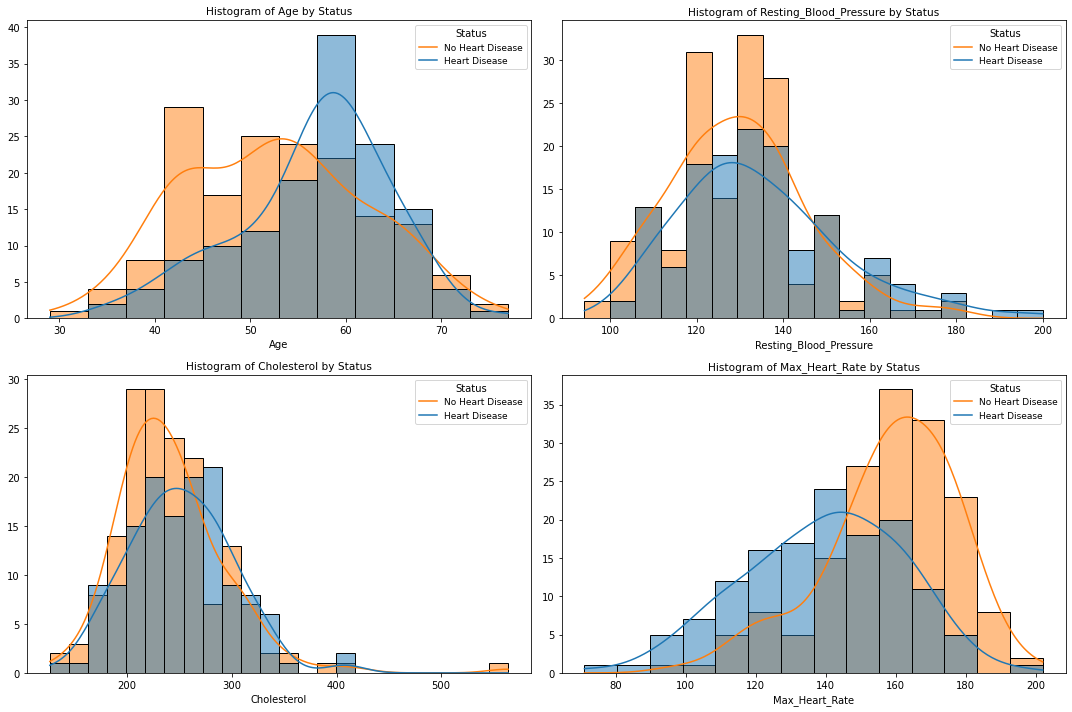

In [7]:
N_Features = ['Age', 'Resting_Blood_Pressure', 'Cholesterol', 'Max_Heart_Rate']

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))

for i, feature in enumerate(N_Features):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    sns.histplot(data, 
                 x = feature, 
                 hue = 'Status', 
                 kde = True, 
                 fill = True, 
                 ax = ax, 
                 legend = False
                )
    ax.set_title(f'Histogram of {feature} by Status', fontsize = 10.5)
    ax.set_xlabel(feature)
    ax.set_ylabel('')
    ax.legend(title = 'Status', labels = ['No Heart Disease', 'Heart Disease'], fontsize = 9)

plt.tight_layout()
plt.show()

Research Question 1: What are some early detectors of heart disease that can be detected?

In [8]:
min_samples_split_list = [2, 4, 8, 16, 32, 64, 128, 150, 200, 300, 400, 500, 600] #ending it at 600 due to the small population size
max_depth_list = [1, 2, 3, 4, 8, 16, 32, 64, None]
RANDOM_STATE = 41

In [9]:
features = [x1 for x1 in data.columns if x1 not in 'Status']
X_train, X_val, y_train, y_val = train_test_split(data[features], 
                                                  data['Status'], 
                                                  train_size = 0.8,
                                                  random_state = RANDOM_STATE
                                                 )

Perform checks for decision tree model:
1) Determine the optimal minimal sample split

2) Determine the optimal maximum depth

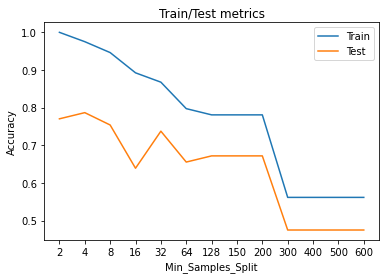

In [10]:
accuracy_list_train = []
accuracy_list_val = []
for min_samples_split in min_samples_split_list:
    model = DecisionTreeClassifier(min_samples_split = min_samples_split, 
                                   random_state = RANDOM_STATE).fit(X_train, y_train)
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    accuracy_train = accuracy_score(predictions_train, y_train)
    accuracy_val = accuracy_score(predictions_val, y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)
plt.title('Train/Test metrics')
plt.xlabel('Min_Samples_Split')
plt.ylabel('Accuracy')
plt.xticks(ticks = range(len(min_samples_split_list)), labels = min_samples_split_list)
sns.lineplot(x = range(len(min_samples_split_list)), y = accuracy_list_train)
sns.lineplot(x = range(len(min_samples_split_list)), y = accuracy_list_val)
plt.legend(['Train', 'Test'])

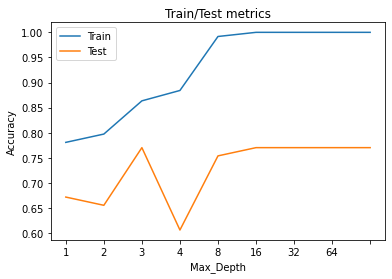

In [11]:
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:
    model = DecisionTreeClassifier(max_depth = max_depth,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train/Test metrics')
plt.xlabel('Max_Depth')
plt.ylabel('Accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels = max_depth_list)
sns.lineplot(x = range(len(max_depth_list)), y = accuracy_list_train)
sns.lineplot(x = range(len(max_depth_list)), y = accuracy_list_val)
plt.legend(['Train','Test'])

We observe an optimal max_depth of 2 as thats where both the train and test data are the closest. When max_depth > 2, the model will be overfitting as the training dataset is highly accuracte while the test data diverges and becomes inaccurate.

In [12]:
#Therefore we will be adopting the use of the following max_depth and min_samples_split
MAX_DEPTH = 3 
MIN_SAMPLES_SPLIT = 220

In [16]:
#Node Class
class Node():
    def __init__(self, feature_index = None, threshold = None, left = None, right = None, var_red = None, value = None):
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.var_red = var_red
        self.value = value

#Tree class: Constructor to reduce overfitting (pre-build)
class DecisionTreeRegressor():
    def __init__(self, min_samples_split = MIN_SAMPLES_SPLIT, max_depth = MAX_DEPTH):
        self.root = None
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        
#Building the tree
    def build_tree(self, dataset, curr_depth = 0):
        X = dataset[:, : -1]
        Y = dataset[:, -1]
        num_samples, num_features = np.shape(X)
        best_split = {} #holder for variance reduction
        if num_samples >= self.min_samples_split and curr_depth <= self.max_depth:
            best_split = self.get_best_split(dataset, num_samples, num_features)
            if best_split["var_red"] > 0:
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth + 1)
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth + 1)
                return Node(best_split["feature_index"], 
                            best_split["threshold"],
                            left_subtree,
                            right_subtree,
                            best_split["var_red"]
                           )
        leaf_value = self.calculate_leaf_value(Y)
        return Node(value = leaf_value)

#Reducting the variance by combining both child nodes and reducing it    
    def variance_reduction(self, parent, first_child, r_child):
        weight_1 = len(first_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        reduction = np.var(parent) - ((weight_1 * np.var(first_child)) + (weight_r * np.var(r_child)))
        return reduction
                                      
    def calculate_leaf_value(self, Y):
        val = np.mean(Y)
        return val
                                      
    def split(self, dataset, feature_index, threshold):
        dataset_left = np.array([row for row in dataset if row[feature_index] <= threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index] > threshold])
        return dataset_left, dataset_right
                                      
    def get_best_split(self, dataset, num_samples, num_features):
        best_split = {}
        max_var_red = -float("inf")
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            for threshold in possible_thresholds:
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                if len(dataset_left) > 0 and len(dataset_right) > 0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    curr_var_red = self.variance_reduction(y, left_y, right_y)
                    if curr_var_red > max_var_red:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["var_red"] = curr_var_red
                        max_var_red = curr_var_red
        return best_split

#Prints our decision tree
    def print_tree(self, tree = None, indent = " "):
        if not tree:
            tree = self.root
        if tree.value is not None:
            print(tree.value)
        else:
            print("X_" + str(tree.feature_index), "<=", tree.threshold, "?", tree.var_red)
            print("%sleft:" % (indent), end = "")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end = "")
            self.print_tree(tree.right, indent + indent)

#Starts the training of the model
    def fit(self, X, Y):
        dataset = np.concatenate((X, Y), axis = 1)
        self.root = self.build_tree(dataset)
        
#Makes a prediction based on the corresponding number of the Y value                                      
    def make_prediction(self, x, tree):
        if tree.value != None: 
            return tree.value
        feature_val = x[tree.feature_index]
        if feature_val <= tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)
                                    
#Parses a new datapoint through the make_predictions datapoint and outputs array of target values
    def predict(self, X):
        predictions = [self.make_prediction(x, self.root) for x in X]
        return predictions

In [17]:
X2 = data.loc[:,['Max_Heart_Rate', 'Exercise_Angina', 'Age','Resting_Blood_Pressure', 'Cholesterol', 'n_Major_Vessels', 'Chest_Pain']].values
y2 = data.loc[:,'Status'].values.reshape(-1,1)
X_train, X_test, Y_train, Y_test = train_test_split(X2, y2, test_size = 0.2, random_state = RANDOM_STATE)

In [18]:
regressor = DecisionTreeRegressor(min_samples_split = MIN_SAMPLES_SPLIT, max_depth = MAX_DEPTH)
regressor.fit(X_train, Y_train)

In [19]:
regressor.print_tree()

X_6 <= 0 ? 0.0762899033249742
 left:0.25688073394495414
 right:0.8120300751879699


In [20]:
#Redefine Y for the decision tree
y3 = data.loc[:,'Status'].values

regressor = DecisionTreeClassifier(max_depth = MAX_DEPTH)
regressor.fit(X2, y2)
viz_model = dtreeviz.model(regressor,
                          X_train = X2,
                          y_train = y3,
                          target_name = "Status",
                          feature_names = ['Max_Heart_Rate', 'Exercise_Angina', 'Age','Resting_Blood_Pressure', 'Cholesterol', 'n_Major_Vessels', 'Chest_Pain'])

v = viz_model.view()
v.view() #Model will be visible in the browser only

<ipython-input-20-69cb148807f6>:13: DeprecationWarning: DTreeVizRender.view() function is deprecated starting from version 2.0. 
 Please use display() instead


In [22]:
#Redefine X for the linear regression
X4 = data[['Max_Heart_Rate', 'Exercise_Angina', 'Age','Resting_Blood_Pressure', 'Cholesterol', 'n_Major_Vessels', 'Chest_Pain']]
y4 = data[['Status']]

X_train, X_test, y_train, y_test = train_test_split(X4, 
                                                    y4, 
                                                    train_size = 0.8,
                                                    random_state = RANDOM_STATE
                                                   )

LinR = LinearRegression()
LinR.fit(X_train, y_train)
print(LinR.intercept_) #To show the intercept value

n = LinR.coef_
n.shape
n = n.reshape(7,1)

[0.20461934]


In [24]:
c1 = pd.DataFrame(n, X4.columns, columns = ["coeff"])
print(c1)

prediction_Test_LR = LinR.predict(X_test)

                           coeff
Max_Heart_Rate          0.003821
Exercise_Angina        -0.235828
Age                    -0.002243
Resting_Blood_Pressure -0.001290
Cholesterol             0.000382
n_Major_Vessels        -0.122228
Chest_Pain              0.149026


Intercept: [0.2046]
Coefficients:
Max_Heart_Rate : 0.0038
Exercise_Angina : -0.2358
Age : -0.0022
Resting_Blood_Pressure : -0.0013
Cholesterol : 0.0004
n_Major_Vessels : -0.1222
Chest_Pain : 0.149


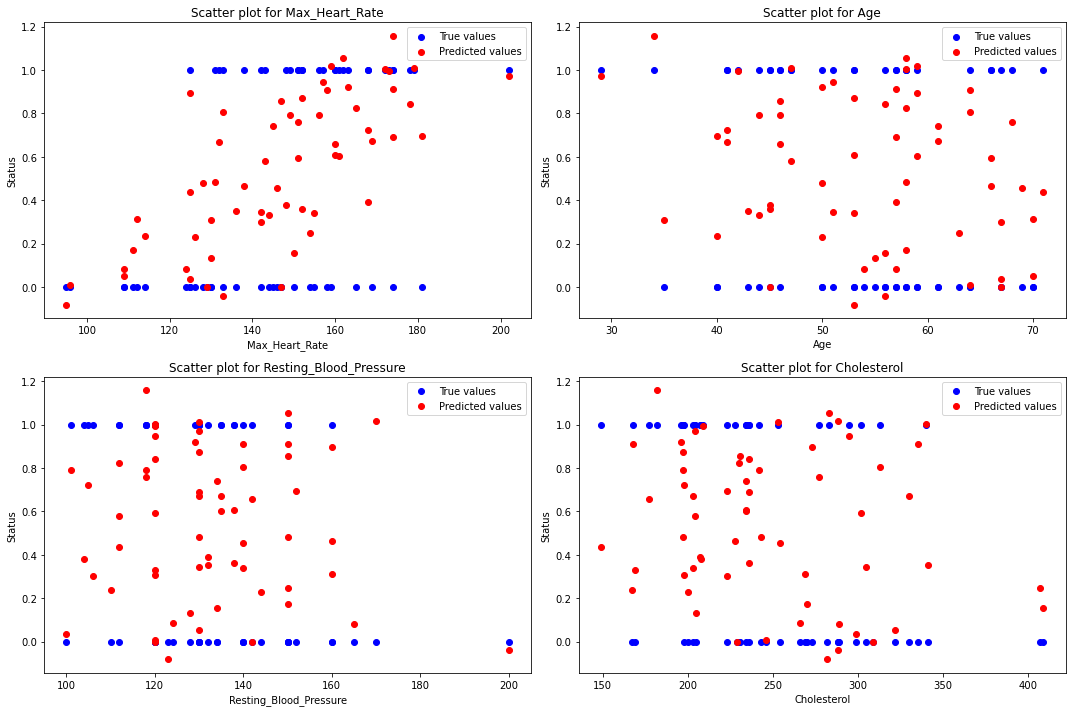

In [25]:
print("Intercept:", LinR.intercept_.round(4))
print("Coefficients:")
for feature, coef in zip(X4.columns, LinR.coef_[0]):
    print(feature, ':', coef.round(4))

# Predictions on the test set
predictions = LinR.predict(X_test)

plt.figure(figsize = (15, 10))
subplot_index = 1  
for col in X4.columns:
    if col not in ['Chest_Pain', 'Exercise_Angina', 'n_Major_Vessels']:  
        plt.subplot(2, 2, subplot_index)
        plt.scatter(X_test[col], y_test, color = 'blue', label = 'True values')
        plt.scatter(X_test[col], predictions, color = 'red', label = 'Predicted values')
        plt.xlabel(col)
        plt.ylabel('Status')
        plt.title(f'Scatter plot for {col}')
        plt.legend()
        subplot_index += 1
plt.tight_layout()

In [26]:
print(f'Test MAE: {metrics.mean_absolute_error(y_test, prediction_Test_LR):.4f}')
print(f'Test RMSE: {np.sqrt(metrics.mean_squared_error(y_test,prediction_Test_LR)):.4f}')

Test MAE: 0.3305
Test RMSE: 0.4276


In [27]:
#Stating our Logistic Regression variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
model = LogisticRegression()
model.fit(X_train, y_train)
predicted = model.predict(X_test)
conf = confusion_matrix(y_test, predicted)
accuracy = round(accuracy_score(y_test, predicted) * 100, 2)
print ("Confusion Matrix : \n", conf)
print("The accuracy of Logistic Regression is : ", accuracy, "%")

Confusion Matrix : 
 [[23  9]
 [ 7 22]]
The accuracy of Logistic Regression is :  73.77 %


/Users/malcolmteo/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Research Question 2: How confident can we predict heart disease in a person who has not encountered any symptoms?

In [29]:
data.corr()

,Age,Sex,Chest_Pain,Resting_Blood_Pressure,Cholesterol,Fasting_Blood_Sugar,Resting_ECG,Max_Heart_Rate,Exercise_Angina,Old_Peak,ST_Slope,n_Major_Vessels,Thalium,Status
Age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.178396,-0.168814,0.276326,0.068001,-0.225439
Sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.089604,-0.030711,0.118261,0.210041,-0.280937
Chest_Pain,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.180783,0.119717,-0.181053,-0.161736,0.433798
Resting_Blood_Pressure,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.190276,-0.121475,0.101389,0.062210,-0.144931
Cholesterol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.035479,-0.004038,0.070511,0.098803,-0.085239
Fasting_Blood_Sugar,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.022088,-0.059894,0.137979,-0.032019,-0.028046
Resting_ECG,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.055906,0.093045,-0.072042,-0.011981,0.137230
Max_Heart_Rate,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.327627,0.386784,-0.213177,-0.096439,0.421741
Exercise_Angina,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.271144,-0.257748,0.115739,0.206754,-0.436757
Old_Peak,0.178396,0.089604,-0.180783,0.190276,0.035479,0.022088,-0.055906,-0.327627,0.271144,1.000000,-0.555175,0.232167,0.198263,-0.423572


In [30]:
CorrCheck = ['Chest_Pain', 'Max_Heart_Rate', 'Exercise_Angina', 'Age','Resting_Blood_Pressure', 'Cholesterol', 'n_Major_Vessels']
CorrMatrix = data[CorrCheck].corr().round(4)

print(CorrMatrix)

#Chest pain corr w/ Max Heart Rate & Exercise Angina
#Age corr w/ Resting_Blood_Pressure & Cholesterol & Max_Heart_Rate & n_Major_Vessels

                        Chest_Pain  Max_Heart_Rate  Exercise_Angina     Age  \
Chest_Pain                  1.0000          0.2958          -0.3943 -0.0687   
Max_Heart_Rate              0.2958          1.0000          -0.3788 -0.3985   
Exercise_Angina            -0.3943         -0.3788           1.0000  0.0968   
Age                        -0.0687         -0.3985           0.0968  1.0000   
Resting_Blood_Pressure      0.0476         -0.0467           0.0676  0.2794   
Cholesterol                -0.0769         -0.0099           0.0670  0.2137   
n_Major_Vessels            -0.1811         -0.2132           0.1157  0.2763   

                        Resting_Blood_Pressure  Cholesterol  n_Major_Vessels  
Chest_Pain                              0.0476      -0.0769          -0.1811  
Max_Heart_Rate                         -0.0467      -0.0099          -0.2132  
Exercise_Angina                         0.0676       0.0670           0.1157  
Age                                     0.2794     

In [32]:
X5 = data.loc[:,['Max_Heart_Rate', 'Exercise_Angina', 'Age','Resting_Blood_Pressure', 'Cholesterol', 'n_Major_Vessels']].values
y5 = data.loc[:,'Chest_Pain'].values

le = LabelEncoder()
y6 = le.fit_transform(y5)

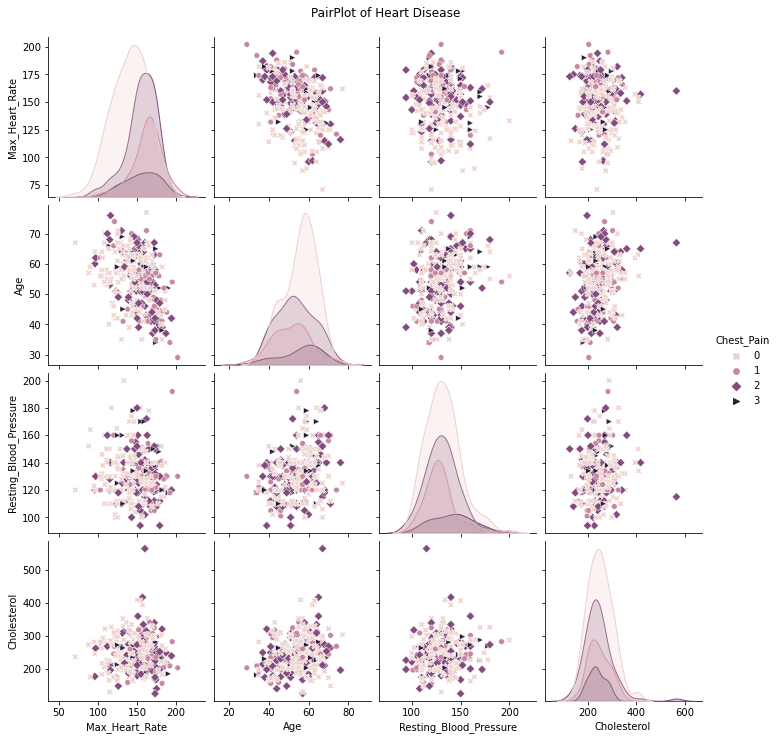

In [33]:
# Create a pair plot to visualize relationships between different features and species.
ax = sns.pairplot(
        data, 
        hue = 'Chest_Pain', 
        markers = ["X", "8", "D", ">"], 
        vars = ['Max_Heart_Rate', 'Age','Resting_Blood_Pressure', 'Cholesterol']
    )

plt.suptitle("PairPlot of Heart Disease", x = 0.5, y = 1.025)

plt.show()

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X5, y5, test_size = 0.3, random_state = RANDOM_STATE)

LDA = LinearDiscriminantAnalysis(n_components = 2)
X_train = LDA.fit_transform(X_train, y_train)
X_test = LDA.transform(X_test)

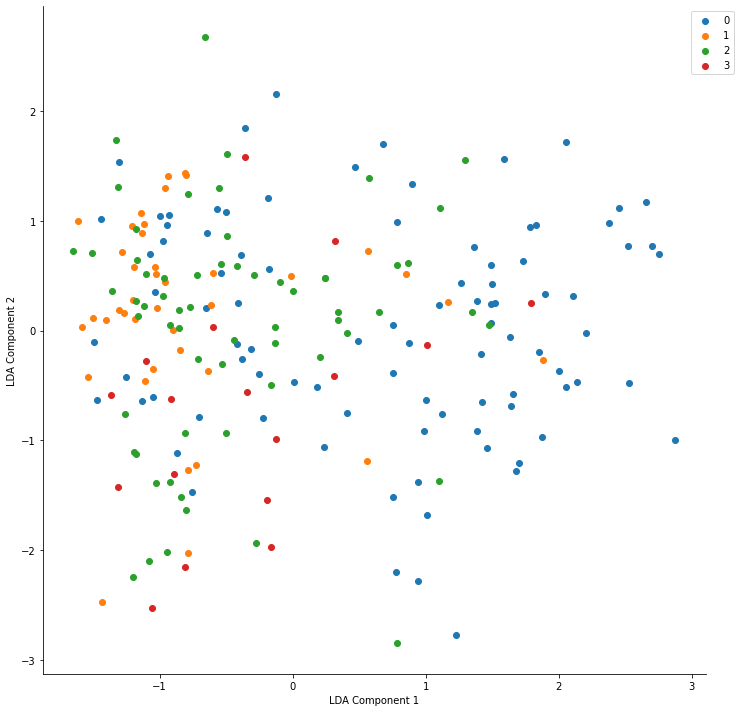

In [35]:
tmp_data = pd.DataFrame(X_train, columns = ['LDA Component 1','LDA Component 2'])
tmp_data['Chest_Pain'] = y_train

sns.FacetGrid(tmp_data, hue = "Chest_Pain", height = 10).map(plt.scatter,
                                                             'LDA Component 1',
                                                             'LDA Component 2'
                                                            )

plt.legend(bbox_to_anchor = (1.05, 1))

In [36]:
#We would go on to test how accurate the predictability of the model using random forest.
classifier = RandomForestClassifier(max_depth = 2, random_state = RANDOM_STATE)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_m = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.62


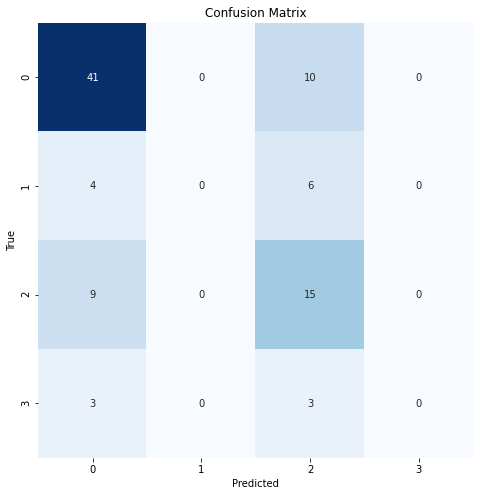

In [37]:
plt.figure(figsize = (8, 8))
sns.heatmap(conf_m, annot = True, fmt = "d", cmap = "Blues", cbar = False, square = True)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

The confusion matrix shows us that we only have an approximate 62% accuracy in correctly identifying heart disease among our dataset based on chest_pain. It also shows that we do not predict any patient to have chest_pain under 1 and 3 denoting atypical angina and asymptomatic chest pain respectively.
- True: 41+4+9+3 = 57
- False: 10+6+15+3 = 34
- Total: 57+34 = 91
- True Accuracy = 57/91 = 62.637%

We now go on to do the splitting of K-means

In [39]:
class Kmeans:
    def __init__(self, n_clusters, max_iter=100, random_state=123):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state

    def first_centroids(self, X):
        np.random.RandomState(self.random_state)
        random_id = np.random.permutation(X.shape[0])
        centroids = X[random_id[:self.n_clusters]]
        return centroids

    def compute_centroids(self, X, labels):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            centroids[k, :] = np.mean(X[labels == k, :], axis=0)
        return centroids

    def compute_distance(self, X, centroids):
        distance = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            row_norm = norm(X - centroids[k, :], axis=1)
            distance[:, k] = np.square(row_norm)
        return distance

    def closest_cluster(self, distance):
        return np.argmin(distance, axis=1)

    def compute_sse(self, X, labels, centroids):
        distance = np.zeros(X.shape[0])
        for k in range(self.n_clusters):
            distance[labels == k] = norm(X[labels == k] - centroids[k], axis=1)
        return np.sum(np.square(distance))
    
    def fit(self, X):
        self.centroids = self.first_centroids(X)
        for i in range(self.max_iter):
            old_centroids = self.centroids
            distance = self.compute_distance(X, old_centroids)
            self.labels = self.closest_cluster(distance)
            self.centroids = self.compute_centroids(X, self.labels)
            if np.all(old_centroids == self.centroids):
                break
        self.error = self.compute_sse(X, self.labels, self.centroids)
    
    def predict(self, X):
        old_centroids = self.centroids#to define old within function
        distance = self.compute_distance(X, old_centroids)
        return self.closest_cluster(distance)

In [40]:
alpha = pd.get_dummies(data['Chest_Pain'])
beta = pd.get_dummies(data['Max_Heart_Rate'])
charlie = pd.get_dummies(data['Sex'])
delta = pd.get_dummies(data['Resting_ECG'])

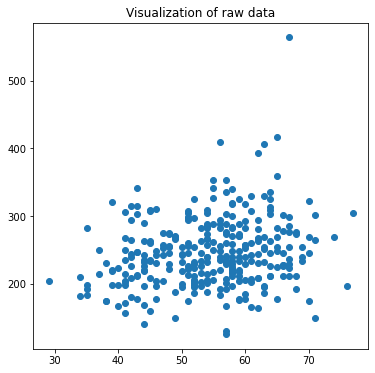

In [41]:
frames = [data, alpha, beta, charlie, delta]
data_K_Mean = pd.concat(frames, axis = 1)

data_K_Mean_copy = data.drop(columns = ['Chest_Pain', 'Max_Heart_Rate', 'Sex', 'Resting_ECG'])
data_K_Mean_copy.head()

data_drop = data.drop(columns = ['Status'])
data_drop.head(5)

plt.figure(figsize = (6, 6))
X6 = data_K_Mean_copy['Age']
y6 = data_K_Mean_copy['Cholesterol']
plt.scatter(X6, y6)
plt.xlabel('')
plt.ylabel('')
plt.title('Visualization of raw data');

data_K_Means = data_K_Mean_copy[['Age', 'Cholesterol']]

We find out the best number of clusters using elbow method

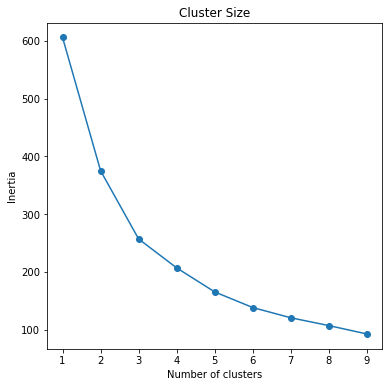

In [42]:
sse = []
list_k = list(range(1, 10))
X_std = StandardScaler().fit_transform(data_K_Means)

for k in list_k:
    km = KMeans(n_clusters = k)
    km.fit(X_std)
    sse.append(km.inertia_)

plt.figure(figsize = (6, 6))
plt.title('Cluster Size')
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters')
plt.ylabel('Inertia');

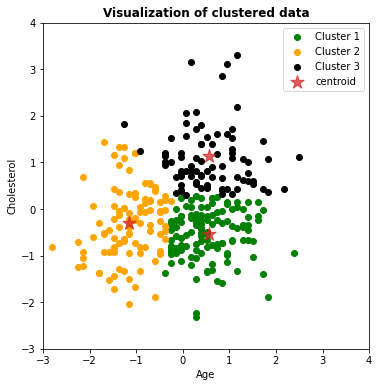

In [43]:
#We observe 3 cluster to be the best for our dataset
km = Kmeans(n_clusters = 3, max_iter = 500, random_state = RANDOM_STATE)
km.fit(X_std)
centroids = km.centroids

labels_ = km.predict(X_std)
labels_

fig, ax = plt.subplots(figsize = (6, 6))
plt.scatter(X_std[labels_ == 0, 0], 
            X_std[labels_ == 0, 1],
            c = 'green', 
            label = 'Cluster 1'
           )
plt.scatter(X_std[labels_ == 1, 0], 
            X_std[labels_ == 1, 1],
            c = 'orange', 
            label = 'Cluster 2'
           )
plt.scatter(X_std[labels_ == 2, 0],
            X_std[labels_ == 2, 1],
            c = 'black', 
            label = 'Cluster 3'
           )
plt.scatter(centroids[:, 0], 
            centroids[:, 1], 
            marker = '*', 
            s = 200,
            c = '#d62728',
            label = 'centroid',
            alpha = 0.75
           )

plt.legend()
plt.xlim([-3, 4])
plt.ylim([-3, 4])
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Visualization of clustered data', fontweight = 'bold')
ax.set_aspect('equal');

/Users/malcolmteo/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/malcolmteo/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


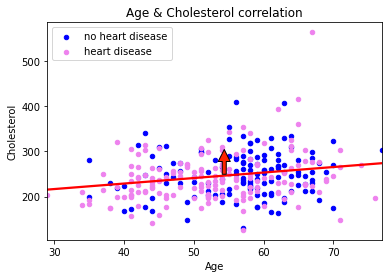

In [44]:
data_K_Means.loc[:, 'Chest_Pain'] = labels_
fig, ax = plt.subplots()
colors = {0:'blue', 1:'violet'}
grouped = data.groupby('Status')
for key, group in grouped:
    label_name = 'heart disease' if key == 1 else 'no heart disease'
    group.plot(ax = ax, 
               kind = 'scatter', 
               x = 'Age', 
               y = 'Cholesterol', 
               label = label_name, 
               color = colors[key]
              )

sns.regplot(data = data, 
            x = 'Age',
            y = 'Cholesterol',
            scatter = False,
            ax = ax,
            color = 'red',
            ci = None
           )    

slope, intercept = np.polyfit(data['Age'], data['Cholesterol'], 1)

arrow_length = 50
ax.annotate('', 
            xy = (data['Age'].mean(), data['Cholesterol'].mean() + arrow_length * slope),
            xytext = (data['Age'].mean(), data['Cholesterol'].mean()),
            arrowprops = dict(facecolor = '#FF2400', shrink=0.05))

plt.title('Age & Cholesterol correlation')
plt.show()

Repeating the process for each continous variable

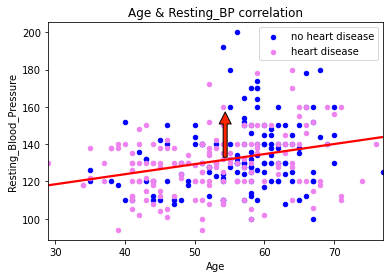

In [45]:
fig, ax = plt.subplots()
for key, group in grouped:
    label_name = 'heart disease' if key == 1 else 'no heart disease'
    group.plot(ax = ax, 
               kind = 'scatter', 
               x = 'Age', 
               y = 'Resting_Blood_Pressure', 
               label = label_name, 
               color = colors[key]
              )

sns.regplot(data = data, 
            x = 'Age',
            y = 'Resting_Blood_Pressure',
            scatter = False,
            ax = ax,
            color = 'red',
            ci = None
           )

slope, intercept = np.polyfit(data['Age'], data['Resting_Blood_Pressure'], 1)

arrow_length = 50
ax.annotate('', 
            xy = (data['Age'].mean(), data['Resting_Blood_Pressure'].mean() + arrow_length * slope),
            xytext = (data['Age'].mean(), data['Resting_Blood_Pressure'].mean()),
            arrowprops = dict(facecolor = '#FF2400', shrink=0.05))
    
plt.title('Age & Resting_BP correlation')
plt.show()

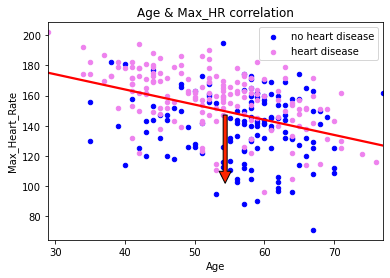

In [46]:
fig, ax = plt.subplots()
for key, group in grouped:
    label_name = 'heart disease' if key == 1 else 'no heart disease'
    group.plot(ax = ax, 
               kind = 'scatter', 
               x = 'Age', 
               y = 'Max_Heart_Rate', 
               label = label_name, 
               color = colors[key]
              )

sns.regplot(data = data, 
            x = 'Age',
            y = 'Max_Heart_Rate',
            scatter = False,
            ax = ax,
            color = 'red',
            ci = None
           )   

slope, intercept = np.polyfit(data['Age'], data['Max_Heart_Rate'], 1)

arrow_length = 50
ax.annotate('', 
            xy = (data['Age'].mean(), data['Max_Heart_Rate'].mean() + arrow_length * slope),
            xytext = (data['Age'].mean(), data['Max_Heart_Rate'].mean()),
            arrowprops = dict(facecolor = '#FF2400', shrink=0.05))

plt.title('Age & Max_HR correlation')
plt.show()

Research Question 3: Does the age of the person play a role in the risk of the onset of heart disease?

We will be performing a likelihood test where we are testing if age is be an important factor by conducting the following hypothesis testing:

In [47]:
#Obtaining the full model
#Reponse Variable 
y7 = data['Chest_Pain']

#Predictor Variable
x7 = data[['Resting_Blood_Pressure', 'Cholesterol', 'Max_Heart_Rate', 'Age']]

#Adding a constant
x7 = sm.add_constant(x7)

#Fitting the regression
F_Model = sm.OLS(y7, x7).fit()

#Calculating the log-likelihood of the model
logLF = F_Model.llf

BIC_F = F_Model.bic

print(logLF)
print(BIC_F)

-422.8503366858331
874.2693373992131


In [48]:
##### Obtaining the reduced model
y8 = data['Chest_Pain']

#Predictor Variable
x8 = data[['Resting_Blood_Pressure', 'Cholesterol', 'Max_Heart_Rate']]

x8 = sm.add_constant(x8)

R_Model = sm.OLS(y8, x8).fit()
    
logLR = R_Model.llf

BIC_R = R_Model.bic

print(logLR)
print(BIC_R)

-423.3706533862568
869.5962379945511


In [49]:
X_train, X_test, y_train, y_test = train_test_split(data[['Resting_Blood_Pressure', 'Cholesterol', 'Max_Heart_Rate', 'Age', 'Exercise_Angina', 'n_Major_Vessels', 'Chest_Pain']], 
                                                  data['Status'], 
                                                  train_size = 0.8,
                                                  random_state = RANDOM_STATE
                                                 ) #need to use this confirm again friday night

Y_pred = regressor.predict(X_train)
print(f'Training model RMSE is: {np.sqrt(mean_squared_error(Y_train, Y_pred)):.4f}')

y_predict = regressor.predict(X_test)
print(f'Testing model RMSE is: {np.sqrt(mean_squared_error(Y_test, y_predict)):.4f}')


Training model RMSE is: 0.5183
Testing model RMSE is: 0.5432


In [50]:
#Likelihood ratio test using a chi-square test statistic
LLR = -2*(logLR - logLF)

print(LLR)

LLR_Pval = spy.stats.chi2.sf(LLR, 1)

print(LLR_Pval)

1.040633400847355
0.30767420538697465


Therefore since our p-value is more than 0.05, we do not reject the null hypothesis and conclude that the full and nested models are not identical.

Given that we are no more inclined to model 1 than to model 2, age is not a statstically significant variable

In [51]:
cols_obj = ['Sex', 'Chest_Pain', 'Resting_ECG', 'Exercise_Angina', 'ST_Slope']
obj_data = data.copy()
obj_data[cols_obj] = obj_data[cols_obj].astype(np.object)

<ipython-input-51-e615903fe899>:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [52]:
string_col = obj_data.select_dtypes(include="object").columns
obj_data[string_col] = obj_data[string_col].astype("string")
obj_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     303 non-null    int64 
 1   Sex                     303 non-null    string
 2   Chest_Pain              303 non-null    string
 3   Resting_Blood_Pressure  303 non-null    int64 
 4   Cholesterol             303 non-null    int64 
 5   Fasting_Blood_Sugar     303 non-null    int64 
 6   Resting_ECG             303 non-null    string
 7   Max_Heart_Rate          303 non-null    int64 
 8   Exercise_Angina         303 non-null    string
 9   Old_Peak                303 non-null    int64 
 10  ST_Slope                303 non-null    string
 11  n_Major_Vessels         303 non-null    int64 
 12  Thalium                 303 non-null    int64 
 13  Status                  303 non-null    int64 
dtypes: int64(9), string(5)
memory usage: 33.3 KB


In [53]:
string_col = obj_data.select_dtypes("string").columns.to_list()
num_col = obj_data.columns.to_list()
target_var = "Age"

for col in string_col:
    num_col.remove(col)
num_col.remove(target_var)

In [54]:
#Apply one hot encoding for proper distribution
data_notree = pd.get_dummies(obj_data, columns = string_col, drop_first = False)
data_notree.head()

#Redefining y value, and placing the status column to the end using the drop and concat function
y9 = data_notree[target_var].values
data_notree.drop(target_var, axis=1, inplace=True)
data_notree = pd.concat([data_notree,obj_data[target_var]], axis=1)
data_notree.head()

,Resting_Blood_Pressure,Cholesterol,Fasting_Blood_Sugar,Max_Heart_Rate,Old_Peak,n_Major_Vessels,Thalium,Status,Sex_0,Sex_1,...,Chest_Pain_3,Resting_ECG_0,Resting_ECG_1,Resting_ECG_2,Exercise_Angina_0,Exercise_Angina_1,ST_Slope_0,ST_Slope_1,ST_Slope_2,Age
0,145,233,1,150,2,0,1,1,0,1,...,1,1,0,0,1,0,1,0,0,63
1,130,250,0,187,3,0,2,1,0,1,...,0,0,1,0,1,0,1,0,0,37
2,130,204,0,172,1,0,2,1,1,0,...,0,1,0,0,1,0,0,0,1,41
3,120,236,0,178,0,0,2,1,0,1,...,0,0,1,0,1,0,0,0,1,56
4,120,354,0,163,0,0,2,1,1,0,...,0,0,1,0,0,1,0,0,1,57


In [55]:
feature_data_notree = data_notree.columns.to_list()
feature_data_notree.remove(target_var)

In [56]:
#Setting up the empty lists
mse_svm = []
rmse_svm = []
mae_svm = []

In [57]:
#For the Linear Kernel
kf = model_selection.StratifiedKFold(n_splits = 5)
for fold, (trn_, val_) in enumerate(kf.split(X = data_notree, y = y9)):
    X_train = data_notree.loc[trn_, feature_data_notree]
    y_train = data_notree.loc[trn_, target_var]
    
    X_valid = data_notree.loc[val_, feature_data_notree]
    y_valid = data_notree.loc[val_, target_var]
    
    ro_scaler = MinMaxScaler()
    X_train = ro_scaler.fit_transform(X_train)
    X_valid = ro_scaler.transform(X_valid)
    
    clf_L = SVC(kernel = "linear")
    clf_L.fit(X_train, y_train)
    y_pred = clf_L.predict(X_valid)
    mse1 = mean_squared_error(y_valid, y_pred)
    rmse1 = np.sqrt(mse1)
    mae1 = mean_absolute_error(y_valid, y_pred)
    mse_svm.append(mse1)
    rmse_svm.append(rmse1)
    mae_svm.append(mae1)
    print(f"The linear fold is : {fold} : ")
    print(f"MSE for fold {fold+1}: {mse1 * 100:.2f}")
    print(f"RMSE for fold {fold+1}: {rmse1 * 100:.2f}")
    print(f"MAE for fold {fold+1}: {mae1 * 100:.2f}")
    
    pass

The linear fold is : 0 : 
MSE for fold 1: 12754.10
RMSE for fold 1: 1129.34
MAE for fold 1: 924.59
The linear fold is : 1 : 
MSE for fold 2: 13001.64
RMSE for fold 2: 1140.25
MAE for fold 2: 909.84
The linear fold is : 2 : 
MSE for fold 3: 7772.13
RMSE for fold 3: 881.60
MAE for fold 3: 680.33
The linear fold is : 3 : 
MSE for fold 4: 7770.00
RMSE for fold 4: 881.48
MAE for fold 4: 630.00
The linear fold is : 4 : 
MSE for fold 5: 10156.67
RMSE for fold 5: 1007.80
MAE for fold 5: 796.67


/Users/malcolmteo/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.


In [58]:
#For the Sigmoid Kernel

for fold, (trn_, val_) in enumerate(kf.split(X = data_notree, y = y9)):
    X_train = data_notree.loc[trn_, feature_data_notree]
    y_train = data_notree.loc[trn_, target_var]
    
    X_valid = data_notree.loc[val_, feature_data_notree]
    y_valid = data_notree.loc[val_, target_var]
    
    ro_scaler = MinMaxScaler()
    X_train = ro_scaler.fit_transform(X_train)
    X_valid = ro_scaler.transform(X_valid)
    
    clf_S = SVC(kernel = "sigmoid")
    clf_S.fit(X_train, y_train)
    y_pred = clf_S.predict(X_valid)
    mse1 = mean_squared_error(y_valid, y_pred)
    rmse1 = np.sqrt(mse1)
    mae1 = mean_absolute_error(y_valid, y_pred)
    mse_svm.append(mse1)
    rmse_svm.append(rmse1)
    mae_svm.append(mae1)
    print(f"The sigmoid fold is : {fold} : ")
    print(f"MSE for fold {fold+1}: {mse1 * 100:.2f}")
    print(f"RMSE for fold {fold+1}: {rmse1 * 100:.2f}")
    print(f"MAE for fold {fold+1}: {mae1 * 100:.2f}")
    
    pass

The sigmoid fold is : 0 : 
MSE for fold 1: 10813.11
RMSE for fold 1: 1039.86
MAE for fold 1: 839.34
The sigmoid fold is : 1 : 
MSE for fold 2: 7634.43
RMSE for fold 2: 873.75
MAE for fold 2: 709.84
The sigmoid fold is : 2 : 
MSE for fold 3: 8090.16
RMSE for fold 3: 899.45
MAE for fold 3: 706.56
The sigmoid fold is : 3 : 
MSE for fold 4: 7210.00
RMSE for fold 4: 849.12
MAE for fold 4: 673.33
The sigmoid fold is : 4 : 
MSE for fold 5: 10478.33
RMSE for fold 5: 1023.64
MAE for fold 5: 818.33


/Users/malcolmteo/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.


In [59]:
#For the RBF Kernel

for fold, (trn_, val_) in enumerate(kf.split(X = data_notree, y = y9)):
    X_train = data_notree.loc[trn_, feature_data_notree]
    y_train = data_notree.loc[trn_, target_var]
    
    X_valid = data_notree.loc[val_, feature_data_notree]
    y_valid = data_notree.loc[val_, target_var]
    
    ro_scaler = MinMaxScaler()
    X_train = ro_scaler.fit_transform(X_train)
    X_valid = ro_scaler.transform(X_valid)
    
    clf_RBF = SVC(kernel = "rbf")
    clf_RBF.fit(X_train, y_train)
    y_pred = clf_RBF.predict(X_valid)
    mse1 = mean_squared_error(y_valid, y_pred)
    rmse1 = np.sqrt(mse1)
    mae1 = mean_absolute_error(y_valid, y_pred)
    mse_svm.append(mse1)
    rmse_svm.append(rmse1)
    mae_svm.append(mae1)
    print(f"The RBF fold is : {fold} : ")
    print(f"MSE for fold {fold+1}: {mse1 * 100:.2f}")
    print(f"RMSE for fold {fold+1}: {rmse1 * 100:.2f}")
    print(f"MAE for fold {fold+1}: {mae1 * 100:.2f}")
    
    pass

The RBF fold is : 0 : 
MSE for fold 1: 10865.57
RMSE for fold 1: 1042.38
MAE for fold 1: 845.90
The RBF fold is : 1 : 
MSE for fold 2: 8557.38
RMSE for fold 2: 925.06
MAE for fold 2: 750.82
The RBF fold is : 2 : 
MSE for fold 3: 6521.31
RMSE for fold 3: 807.55
MAE for fold 3: 639.34
The RBF fold is : 3 : 
MSE for fold 4: 8271.67
RMSE for fold 4: 909.49
MAE for fold 4: 708.33
The RBF fold is : 4 : 
MSE for fold 5: 9578.33
RMSE for fold 5: 978.69
MAE for fold 5: 781.67


/Users/malcolmteo/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.


In [60]:
#For the polynomial kernel

for fold, (trn_, val_) in enumerate(kf.split(X = data_notree, y = y9)):
    X_train = data_notree.loc[trn_, feature_data_notree]
    y_train = data_notree.loc[trn_, target_var]
    
    X_valid = data_notree.loc[val_, feature_data_notree]
    y_valid = data_notree.loc[val_, target_var]
    
    ro_scaler = MinMaxScaler()
    X_train = ro_scaler.fit_transform(X_train)
    X_valid = ro_scaler.transform(X_valid)
    
    clf_poly = SVC(kernel = "poly")
    clf_poly.fit(X_train, y_train)
    y_pred = clf_poly.predict(X_valid)
    mse1 = mean_squared_error(y_valid, y_pred)
    rmse1 = np.sqrt(mse1)
    mae1 = mean_absolute_error(y_valid, y_pred)
    mse_svm.append(mse1)
    rmse_svm.append(rmse1)
    mae_svm.append(mae1)
    print(f"The polynomial fold is : {fold} : ")
    print(f"MSE for fold {fold+1}: {mse1 * 100:.2f}")
    print(f"RMSE for fold {fold+1}: {rmse1 * 100:.2f}")
    print(f"MAE for fold {fold+1}: {mae1 * 100:.2f}")
    
    pass

The polynomial fold is : 0 : 
MSE for fold 1: 11572.13
RMSE for fold 1: 1075.74
MAE for fold 1: 840.98
The polynomial fold is : 1 : 
MSE for fold 2: 11163.93
RMSE for fold 2: 1056.60
MAE for fold 2: 891.80
The polynomial fold is : 2 : 
MSE for fold 3: 8750.82
RMSE for fold 3: 935.46
MAE for fold 3: 757.38
The polynomial fold is : 3 : 
MSE for fold 4: 9680.00
RMSE for fold 4: 983.87
MAE for fold 4: 700.00
The polynomial fold is : 4 : 
MSE for fold 5: 10685.00
RMSE for fold 5: 1033.68
MAE for fold 5: 841.67


/Users/malcolmteo/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.


Therefore using a 3-fold RBF kernal gives us the lowest MSE, RMSE, and MAE at 6521.31, 807.55, and 639.34 respectively.


In [61]:
r2_scores = []
mse_scores = []
rmse_scores = []
mae_scores = []

# Perform cross-validation and calculate regression metrics for each fold
for fold, (trn_, val_) in enumerate(kf.split(X = data_notree, y = y9)):
    X_train = data_notree.loc[trn_, feature_data_notree]
    y_train = data_notree.loc[trn_, target_var]

    X_valid = data_notree.loc[val_, feature_data_notree]
    y_valid = data_notree.loc[val_, target_var]

    ro_scaler = MinMaxScaler()
    X_train = ro_scaler.fit_transform(X_train)
    X_valid = ro_scaler.transform(X_valid)

    clf_RBF = SVC(kernel = "rbf")
    clf_RBF.fit(X_train, y_train)
    y_pred = clf_RBF.predict(X_valid)

    # Calculate regression metrics for the current fold
    r2 = r2_score(y_valid, y_pred)
    mse = mean_squared_error(y_valid, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_valid, y_pred)

    # Append metrics to respective lists
    r2_scores.append(r2)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    mae_scores.append(mae)

    print(f"The RBF fold is : {fold} : ")
    print(f"R-squared for fold {fold+1}: {r2:.4f}")

# Calculate average metrics across all folds
average_r2 = np.mean(r2_scores)
average_mse = np.mean(mse_scores)
average_rmse = np.mean(rmse_scores)
average_mae = np.mean(mae_scores)

# Print or analyze the average metrics
print("\nAverage performance across all folds:")
print(f"Average R-squared: {average_r2:.4f}")
print(f"Average MSE: {average_mse * 100:.2f}")
print(f"Average RMSE: {average_rmse * 100:.2f}")
print(f"Average MAE: {average_mae * 100:.2f}")

The RBF fold is : 0 : 
R-squared for fold 1: -0.1681
The RBF fold is : 1 : 
R-squared for fold 2: -0.1998
The RBF fold is : 2 : 
R-squared for fold 3: 0.1502
The RBF fold is : 3 : 
R-squared for fold 4: -0.1778
The RBF fold is : 4 : 
R-squared for fold 5: -0.0256

Average performance across all folds:
Average R-squared: -0.0842
Average MSE: 8758.85
Average RMSE: 932.63
Average MAE: 745.21


/Users/malcolmteo/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.


In [63]:
#Using GBM to calculate
for fold, (trn_, val_) in enumerate(kf.split(X = data_notree, y = y9)):
    X_train = data_notree.loc[trn_, feature_data_notree]
    y_train = data_notree.loc[trn_, target_var]
    X_valid = data_notree.loc[val_, feature_data_notree]
    y_valid = data_notree.loc[val_, target_var]

    
    ro_scaler = MinMaxScaler()
    X_train_scaled = ro_scaler.fit_transform(X_train)
    X_valid_scaled = ro_scaler.transform(X_valid)
    gbm_model = GradientBoostingRegressor()
    gbm_model.fit(X_train_scaled, y_train)
    
    y_pred = gbm_model.predict(X_valid_scaled)
    r2 = r2_score(y_valid, y_pred)
    mse = mean_squared_error(y_valid, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_valid, y_pred)

    r2_scores.append(r2)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    mae_scores.append(mae)

    print(f"The RBF fold is : {fold} : ")
    print(f"R-squared for fold {fold+1}: {r2:.4f}")
    print(f"MSE for fold {fold+1}: {mse * 100:.2f}")
    print(f"RMSE for fold {fold+1}: {rmse * 100:.2f}")
    print(f"MAE for fold {fold+1}: {mae * 100:.2f}")

average_r2 = np.mean(r2_scores)
average_mse = np.mean(mse_scores) * 100
average_rmse = np.mean(rmse_scores) * 100
average_mae = np.mean(mae_scores) * 100

print("\nAverage performance across all folds:")
print(f"Average R-squared: {average_r2:.4f}")
print(f"Average MSE: {average_mse:.2f}")
print(f"Average RMSE: {average_rmse:.2f}")
print(f"Average MAE: {average_mae:.2f}")

The RBF fold is : 0 : 
R-squared for fold 1: 0.2885
MSE for fold 1: 6618.17
RMSE for fold 1: 813.52
MAE for fold 1: 609.89
The RBF fold is : 1 : 
R-squared for fold 2: -0.0203
MSE for fold 2: 7276.93
RMSE for fold 2: 853.05
MAE for fold 2: 678.61
The RBF fold is : 2 : 
R-squared for fold 3: 0.3169
MSE for fold 3: 5242.21
RMSE for fold 3: 724.03
MAE for fold 3: 602.32
The RBF fold is : 3 : 
R-squared for fold 4: 0.1292
MSE for fold 4: 6115.30
RMSE for fold 4: 782.00
MAE for fold 4: 603.20
The RBF fold is : 4 : 
R-squared for fold 5: 0.1629
MSE for fold 5: 7818.29
RMSE for fold 5: 884.21
MAE for fold 5: 742.82

Average performance across all folds:
Average R-squared: 0.0892
Average MSE: 7326.25
Average RMSE: 851.60
Average MAE: 680.05


/Users/malcolmteo/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.


Research Question 4: Are we able to speed up the detection process using imaging technology?

In [64]:
data_MV = pd.read_csv('train.csv')
#https://www.kaggle.com/competitions/digit-recognizer

In [65]:
data_MV = np.array(data_MV)
m, n = data_MV.shape
np.random.shuffle(data_MV)

data_dev = data_MV[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255

data_train = data_MV[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255
m_train = X_train.shape[0]

In [67]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z): 
    return np.maximum(Z, 0) 

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2
    
def derive_ReLU(Z):
    return Z > 0

def one_hot(YY):
    one_hot_Y = np.zeros((YY.size, YY.max() + 1)) 
    one_hot_Y[np.arange(YY.size), YY] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y
    
def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * derive_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [68]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation = 'nearest')
    plt.show()

In [69]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [70]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)
accuracy = get_accuracy(make_predictions(X_train, W1, b1, W2, b2), Y_train)
print("The accuracy shown is based on training set: {:.2f}%".format(accuracy * 100))

Iteration:  0
[6 9 1 ... 1 3 0] [2 9 5 ... 8 0 5]
0.11958536585365853
Iteration:  10
[6 9 1 ... 1 9 0] [2 9 5 ... 8 0 5]
0.18014634146341463
Iteration:  20
[6 9 1 ... 8 6 0] [2 9 5 ... 8 0 5]
0.2380731707317073
Iteration:  30
[6 9 1 ... 8 6 0] [2 9 5 ... 8 0 5]
0.26382926829268294
Iteration:  40
[2 3 1 ... 8 6 0] [2 9 5 ... 8 0 5]
0.28809756097560973
Iteration:  50
[2 3 1 ... 2 6 0] [2 9 5 ... 8 0 5]
0.32678048780487806
Iteration:  60
[2 3 1 ... 2 6 0] [2 9 5 ... 8 0 5]
0.36990243902439024
Iteration:  70
[2 3 1 ... 2 6 0] [2 9 5 ... 8 0 5]
0.41917073170731706
Iteration:  80
[2 7 1 ... 2 6 0] [2 9 5 ... 8 0 5]
0.47568292682926827
Iteration:  90
[2 7 1 ... 2 6 0] [2 9 5 ... 8 0 5]
0.5223414634146342
Iteration:  100
[2 7 1 ... 2 6 0] [2 9 5 ... 8 0 5]
0.5662926829268292
Iteration:  110
[2 7 3 ... 2 6 0] [2 9 5 ... 8 0 5]
0.6059512195121951
Iteration:  120
[2 7 5 ... 2 0 0] [2 9 5 ... 8 0 5]
0.6369268292682927
Iteration:  130
[2 7 5 ... 2 0 0] [2 9 5 ... 8 0 5]
0.6586585365853659
Iteration

Prediction:  [8]
Label:  8


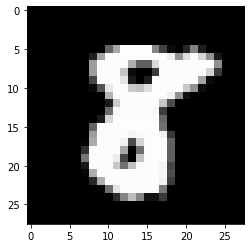

In [71]:
test_prediction(24, W1, b1, W2, b2)

In [72]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
dev_accuracy = get_accuracy(dev_predictions, Y_dev)
print("The accuracy for the training dataset is: {:.2f}%".format(dev_accuracy * 100))

[3 2 4 1 9 6 0 7 5 4 6 7 6 7 5 9 0 8 3 6 2 8 5 4 6 6 2 2 5 3 3 8 5 7 7 1 8
 3 7 7 8 2 9 4 2 5 3 7 3 3 8 6 0 8 5 5 8 8 7 2 9 6 9 2 5 3 0 9 4 9 1 2 2 7
 8 4 3 9 2 8 2 6 9 2 7 6 1 4 5 0 9 7 2 3 4 4 8 5 1 6 7 5 8 3 0 1 2 4 3 3 2
 5 9 1 6 1 1 6 8 9 5 8 8 2 1 3 0 8 9 1 3 5 5 2 9 5 4 4 5 5 7 4 7 9 6 9 7 7
 7 7 4 9 3 7 0 1 6 5 1 5 6 9 7 6 9 6 5 9 1 3 3 1 4 1 9 9 5 2 0 3 3 4 3 1 0
 3 5 5 1 4 2 2 3 4 0 2 2 2 3 0 5 2 8 8 0 0 9 0 1 1 3 8 7 2 4 9 8 4 8 4 4 9
 7 2 9 7 1 8 8 9 7 5 9 6 1 6 4 2 4 0 3 0 9 9 9 5 6 0 6 0 1 5 5 6 9 6 2 9 0
 9 1 8 7 5 0 6 1 2 7 2 3 9 6 4 4 9 3 1 0 4 3 0 0 3 4 3 7 8 5 5 3 6 9 2 1 1
 9 1 2 6 6 1 0 4 4 1 7 1 0 6 2 2 5 3 4 3 0 2 3 4 0 7 1 2 2 8 4 7 5 9 7 6 1
 3 5 9 9 6 7 1 3 3 3 1 5 7 8 0 0 2 3 1 8 1 6 9 0 2 1 6 7 6 8 3 4 8 3 7 2 7
 2 1 3 7 9 6 3 8 3 6 1 4 3 0 5 6 4 3 8 6 4 7 9 3 1 2 4 4 5 8 5 5 3 9 1 8 8
 9 5 2 2 3 8 5 6 7 4 6 9 7 8 9 3 6 7 1 7 3 0 8 7 8 7 3 2 0 0 3 2 4 4 6 8 9
 6 3 0 9 5 3 9 5 9 9 1 3 1 4 4 4 5 6 2 7 7 8 3 4 0 3 1 4 7 9 5 9 2 7 7 0 1
 8 5 6 3 6 7 3 5 1 1 0 2 